# INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS



# PROBLEM STATEMENT: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE


# Exploratory Data Analysis Summary

## Basic Data Checks
Performing initial checks on the dataset to ensure data integrity.

## Data Examination
Thoroughly examining the dataset to understand its structure and contents.

## Statistical Measures
Calculating various statistical measures to gain insights into the data.

## Department Wise Performance
Analyzing the performance of employees based on their respective departments.

## Employee Department and Performance Rating Distribution
Percentage distribution of employees' departments based on their performance ratings.

## Top 3 Important Factors Affecting Employee Performance
Identifying and discussing the top three factors that significantly impact employee performance.

## Distribution of Continuous Features
Visualizing the distribution of continuous features in the dataset.

## Skewness and Kurtosis Check
Examining the skewness and kurtosis of the data to understand its shape.

## Distribution of Mean
Analyzing the distribution of the mean values within the dataset.

## Distribution of Standard Deviation
Exploring the distribution of standard deviation values in the dataset.

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

#### BASIC CHECKS OF DATA

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.shape

(1200, 28)

* Dataset contain total 28 features with 1 unique feature and 1200 observation.

### EXAMINE THE DATA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

* In this data two type of data is available [int64, object]

### STATISTICAL MEASURE OF DATA

In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


* In numerical features no constant column is present.

In [9]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


* In categorical data also no constant column is present.

### DEPARTMENT WISE PERFORMANCE RATING

**PLOT USED**
* Violinplot:  It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
* CountPlot: countplot is used to Show the counts of observations in each categorical bin using bars.

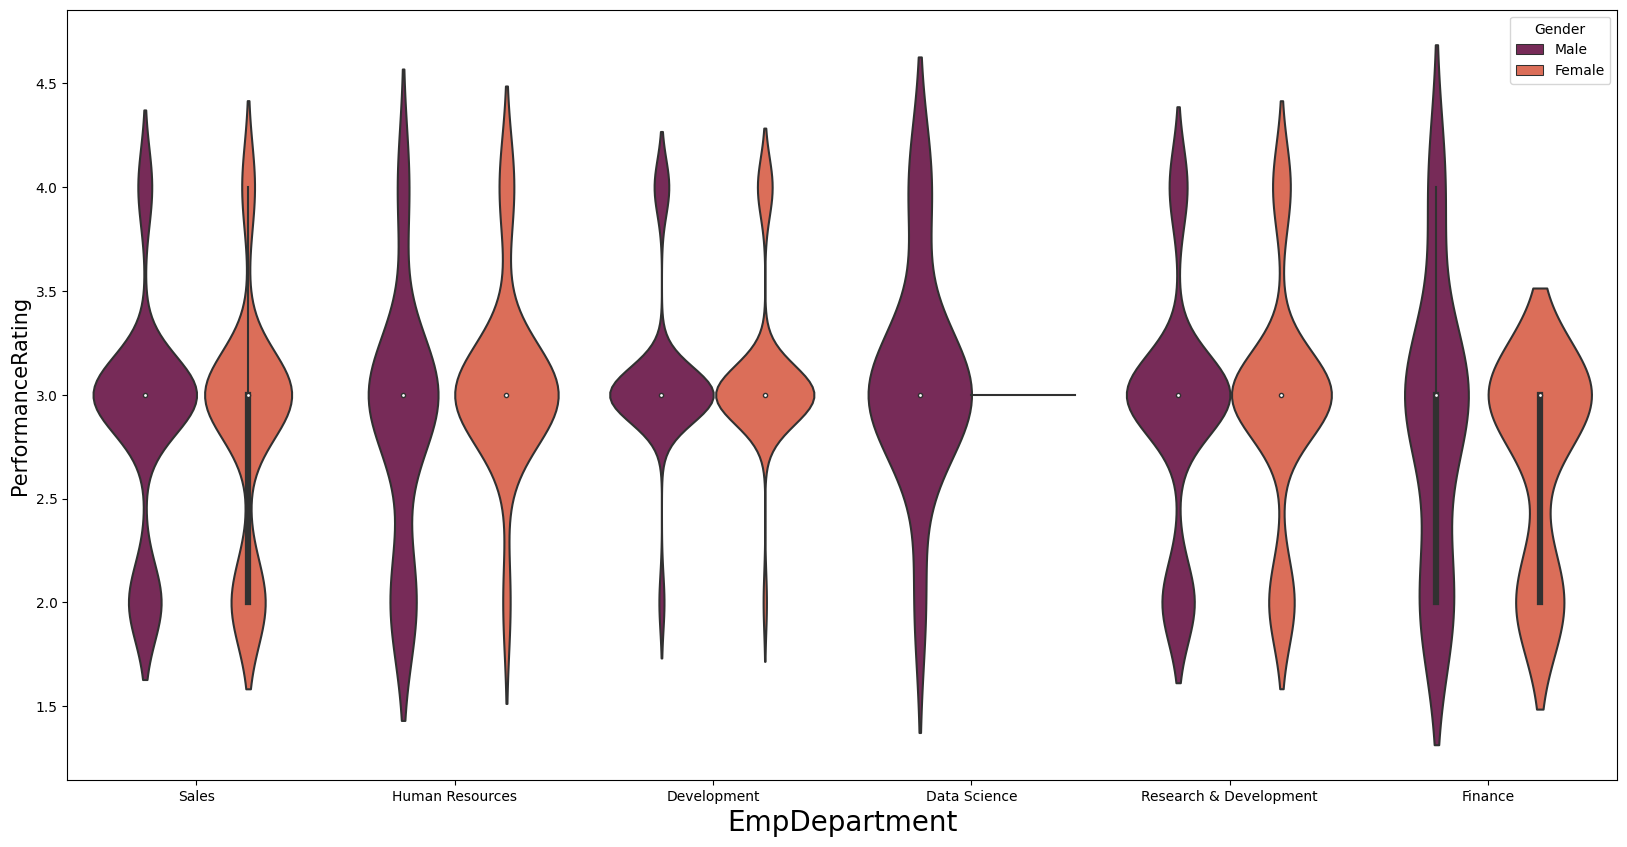

In [10]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

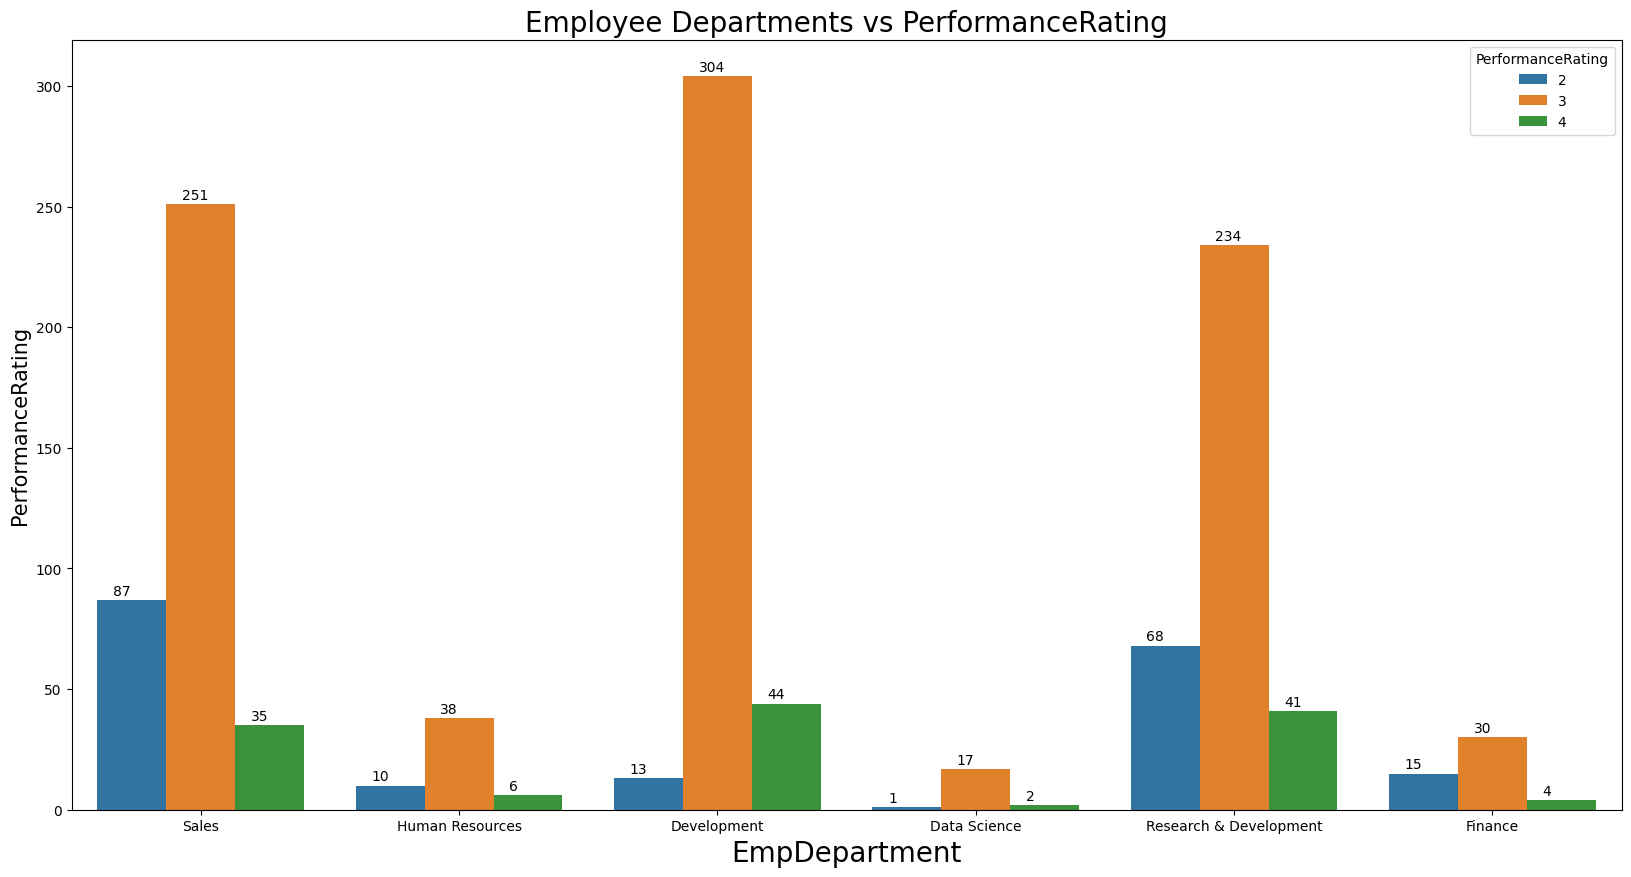

In [11]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

## Observations

1. **Development Department:** The Development department showcases a remarkable trend of high performance ratings. A substantial proportion of employees in this department have achieved high performance ratings.

2. **Sales Department:** In the Sales department, the prevailing performance rating is level 3. Notably, male employees slightly outnumber female employees in terms of performance ratings.

3. **Human Resources (HR) Department:** Within the HR department, a significant number of employees receive a performance rating of level 3. Interestingly, older employees tend to exhibit lower performance levels. Noteworthy, female employees within the HR department demonstrate a consistently strong performance.

4. **Development Department (Revisited):** Reiterating the Development department, a majority of employees secure a level 3 performance rating. Across various age groups, the distribution of performance ratings is prominently centered around level 3. Gender-based performance distribution is relatively equitable.

5. **Data Science Department:** The Data Science department claims the highest average performance rating, with a pronounced concentration at level 3. Notably, there is a relatively lower count of level 2 performers in this department. Overall, the Data Science department stands out with strong performance indicators, particularly among male employees.

6. **Research & Development (R&D) Department:** Performance levels within the R&D department do not exhibit substantial fluctuations across different age brackets. The department boasts diverse age representation across various performance levels. An impressive aspect is the prominence of proficient female employees in the R&D department.

7. **Finance Department:** Within the Finance department, performance levels exhibit a diminishing trend as employee age increases. Male employees within this department consistently display commendable performance. Interestingly, a converse relationship is observed between experience and performance levels.

These comprehensive observations provide valuable insights into the distribution of performance across departments, gender, age groups, and experience levels, thereby laying a robust foundation for further analysis and strategic decision-making.

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [12]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**From visualisation file we get the top 3 factor affecting to the employee performance**
1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

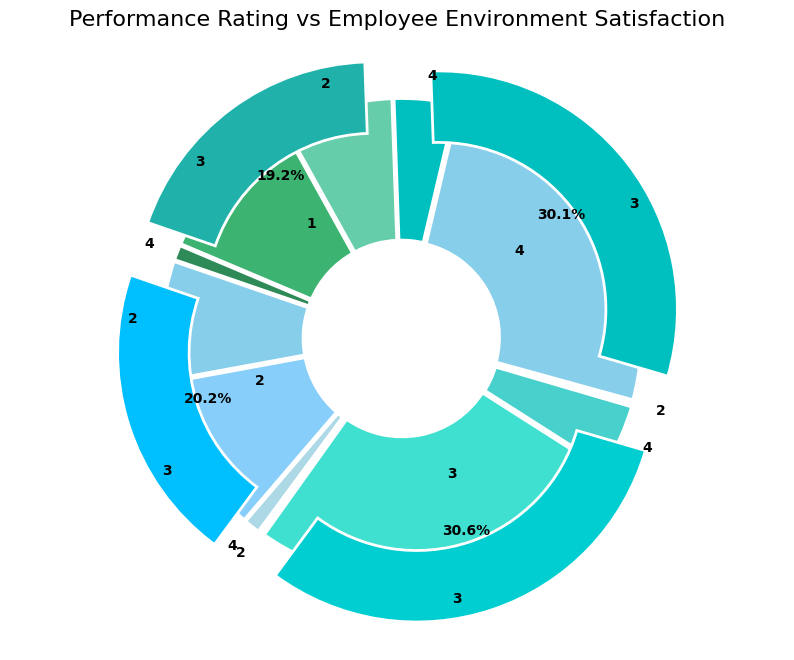

In [13]:
#1. Emp Environment Satisfaction
labels_outer = [2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]
sizes_outer = [90, 127, 13, 98, 130, 14, 3, 310, 54, 3, 307, 51]
colors_outer = ["mediumaquamarine", "mediumseagreen", "seagreen",
                "skyblue", "lightskyblue", 'lightblue',
                'turquoise', 'turquoise', 'mediumturquoise',
                'c', 'skyblue', 'c']
explode_outer = [0.01] * len(labels_outer)

labels_inner = [1, 2, 3, 4]
sizes_inner = [230, 242, 367, 361]
colors_inner = ['lightseagreen', 'deepskyblue', "darkturquoise", "c"]
explode_inner = [0.2, 0.2, 0.2, 0.2]

plt.figure(figsize=(10, 8))
plt.title("Performance Rating vs Employee Environment Satisfaction", fontsize=16)

plt.pie(sizes_outer, labels=labels_outer, colors=colors_outer, explode=explode_outer,
        pctdistance=0.82, textprops={"fontsize": 10, "fontweight": "bold"},
        startangle=92, wedgeprops=dict(width=0.6, edgecolor='w', linewidth=3))

plt.pie(sizes_inner, labels=labels_inner, colors=colors_inner, explode=explode_inner,
        autopct='%.1f%%', pctdistance=0.65, labeldistance=0.4,
        textprops={"fontsize": 10, "fontweight": "bold"},
        startangle=92, wedgeprops=dict(width=0.3, edgecolor='w', linewidth=2))

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [14]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [15]:
# 3.Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpWorkLifeBalance,,,,
1,16,48,0,64
2,51,216,27,294
3,115,533,79,727
4,12,77,26,115
All,194,874,132,1200


**Observation:**

**1.Employee Enviroment satisfaction:** 
* Maximum Number of Employees Performance Rating belongs to EmpEnvironmentSatisfaction Level 3 & Level 4, It contains 367 & 361.

**2.Employee last salary hike percent:** 
* More Number of Employees whose salary hike percentage belongs to 11-19 % are getting 2 & 3 performance rating Maximum time.
* Employees whose salary hike percentage is in between 20-22%, There performance rating is 4

**3.Employee work life balance:** 
* In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees


### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE 
* Those feature continuous in nature only use this feature to plot a distribution

**Distplot:** Distplot is used to observe how the data is distributed in a particular dataset.


In [16]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


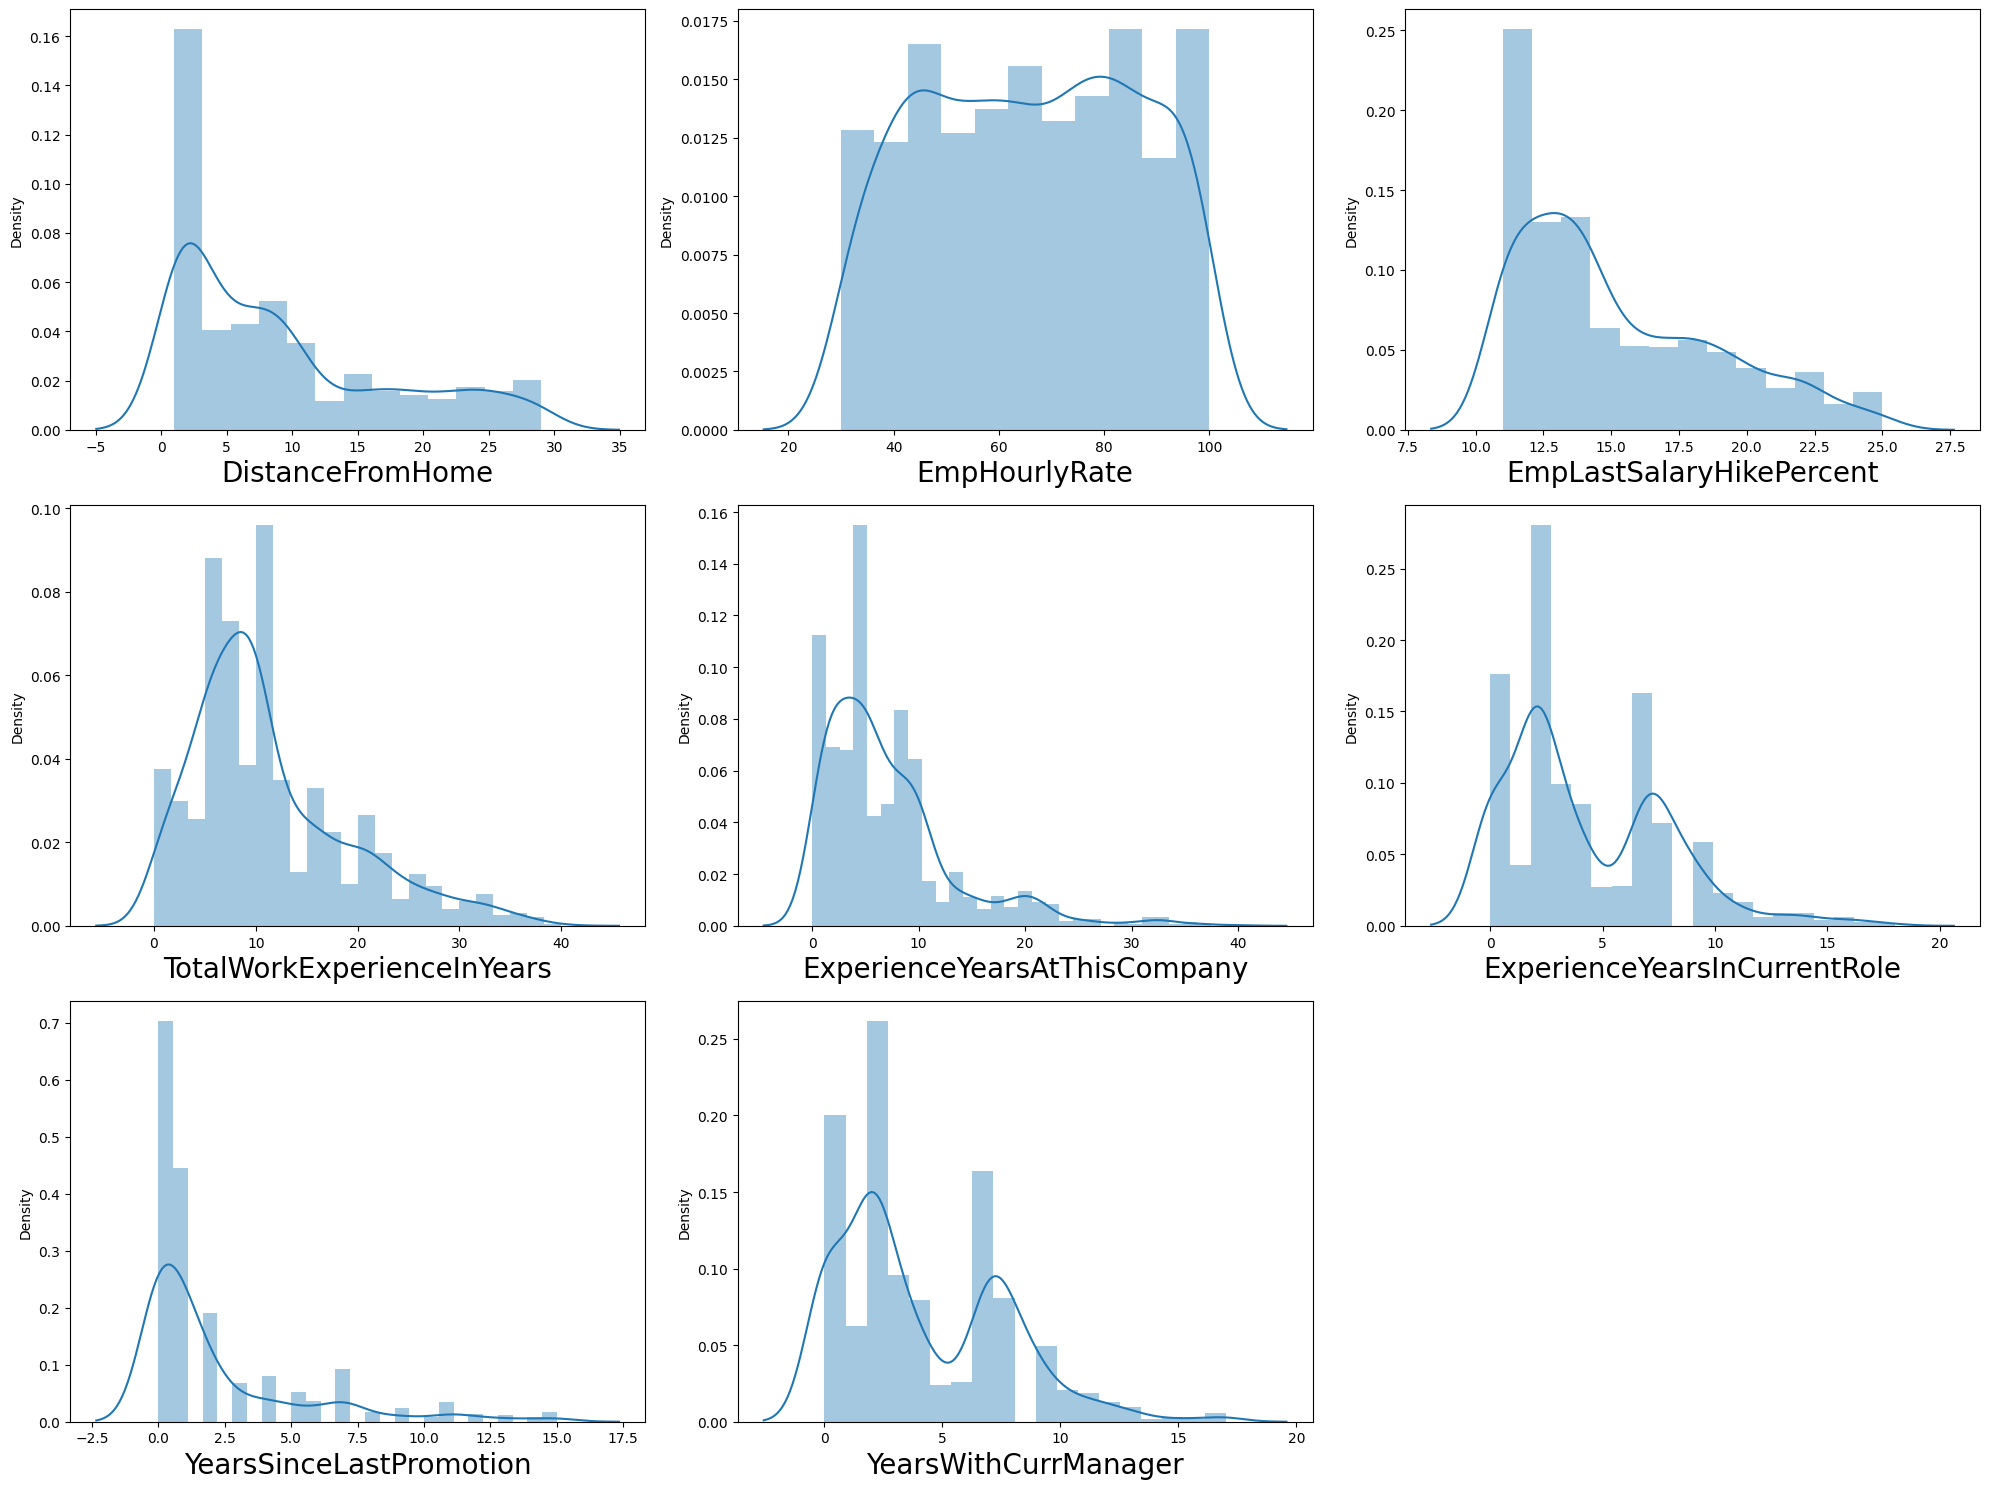

In [17]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


#### CHECK THE SKEWNESS 
**Skewness:** Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness



In [18]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())


1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


* From above all Feature skewness only one feature Year Since Last Promotion have skew so we need to do feature transformation in data preprocessing

####  CHECK THE KURTOSIS

**Kurtosis:**  kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [19]:
print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())


1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


* From above all Feature kurtosis only high in two features experiance year at this company & Year Since Last Promotion have kutosis so we need to do feature transformation in data preprocessing

### DISTRIBUTION OF MEAN OF DATA

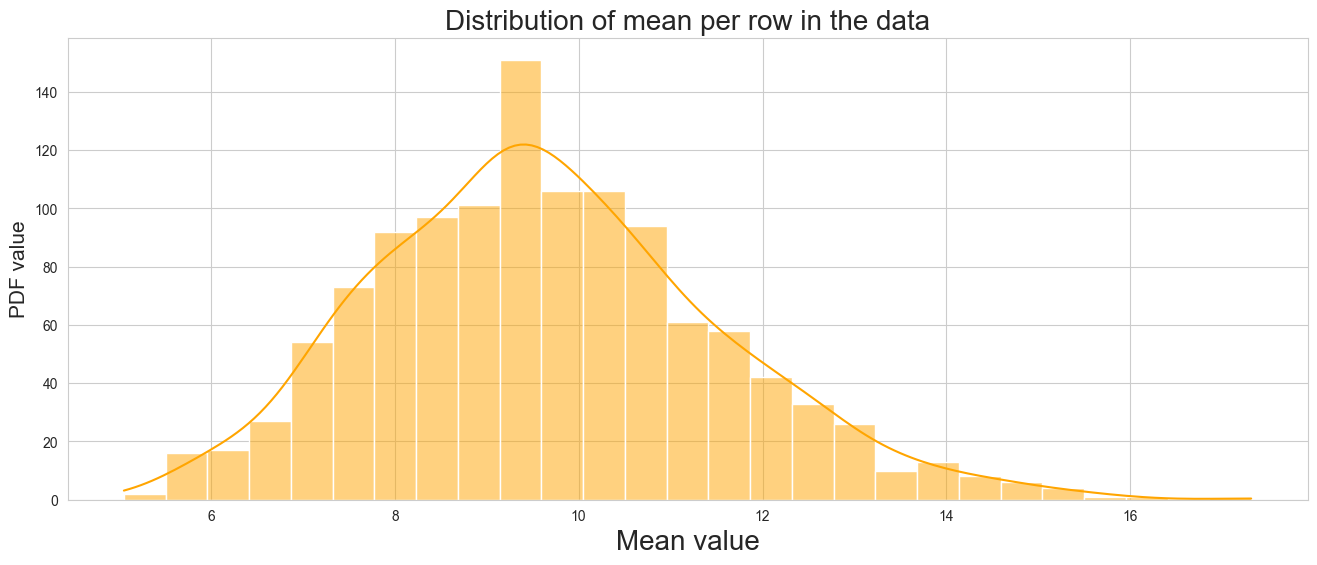

In [25]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')

# Filter numeric columns
numeric_features = data.select_dtypes(include=['number'])

plt.title('Distribution of mean per row in the data', fontsize=20)
plt.xlabel('Mean value', fontsize=20)
plt.ylabel('PDF value', fontsize=15)

# Calculate mean along rows for numeric features
mean_values = numeric_features.mean(axis=1)
sns.histplot(mean_values, color='orange', kde=True)

plt.show()

**Observation:**
* From the above graph close to guassian distribution with mean value 9.5
* From above graph we can say that around 80% feature mean lies between 8.5 to 10.5

### DISTRIBUTION OF STANDARD DEVIATION OF DATA

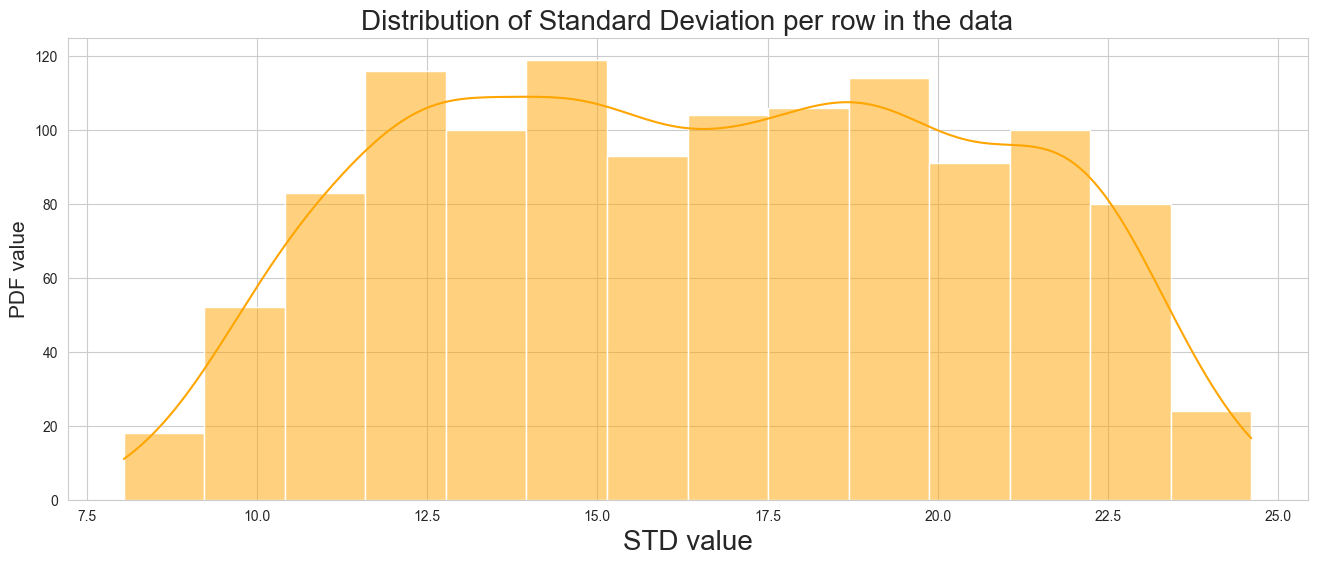

In [29]:
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# Filter numeric columns
numeric_features = data.select_dtypes(include=['number'])

plt.title('Distribution of Standard Deviation per row in the data', fontsize=20)
plt.xlabel('STD value', fontsize=20)
plt.ylabel('PDF value', fontsize=15)

# Calculate standard deviation along rows for numeric features
std_values = numeric_features.std(axis=1)
sns.histplot(std_values, color='orange', kde=True)

plt.show()

**Observation:** This graph also look like guassian distribution around 30% of feature standard deviation around the range of 3 3 to 20 and remaining 70% feature standard deviation in between 0 to 2